In [1]:
import os
import re

import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import tifffile

#### HT206 breast image classification data prep example

In [2]:
metadata = pd.read_csv('../data/brca_HT206/BRCA_206B1_seurat_annot_HandEv3_metadata.txt',
                      sep='\t')
metadata

orig.ident  nCount_Spatial  nFeature_Spatial  \
AAACAAGTATCTCCCA-1  SeuratProject            1195               778   
AAACAATCTACTAGCA-1  SeuratProject           40160              7370   
AAACACCAATAACTGC-1  SeuratProject           24709              6244   
AAACAGAGCGACTCCT-1  SeuratProject            1842              1020   
AAACAGCTTTCAGAAG-1  SeuratProject           49222              9217   
...                           ...             ...               ...   
TTGTTGTGTGTCAAGA-1  SeuratProject            6233              2829   
TTGTTTCACATCCAGG-1  SeuratProject           44782              7502   
TTGTTTCATTAGTCTA-1  SeuratProject            4678              2127   
TTGTTTCCATACAACT-1  SeuratProject            1730               978   
TTGTTTGTGTAAATTC-1  SeuratProject           10153              3729   

                    nCount_SCT  nFeature_SCT  SCT_snn_res.0.8  \
AAACAAGTATCTCCCA-1        5615          1444                0   
AAACAATCTACTAGCA-1        7616          3449                2   
AAACACCAATAACTGC-1        7450          3396               10   
AAACAGAGCGACTCCT-1        5852          1394                1   
AAACAGCTTTCAGAAG-1        8601          4330                7   
...                        ...           ...              ...   
TTGTTGTGTGTCAAGA-1        6598          2828                8   
TTGTTTCACATCCAGG-1        7672          3442                6   
TTGTTTCATTAGTCTA-1        6315          2127                4   
TTGTTTCCATACAACT-1        5789          1387                0   
TTGTTTGTGTAAATTC-1        8023          3709               12   

                    seurat_clusters  orig_cluster  cell_type_image  \
AAACAAGTATCTCCCA-1                0             0     Connective_1   
AAACAATCTACTAGCA-1                2             2  DCIS_connective   
AAACACCAATAACTGC-1               10            10     Connective_5   
AAACAGAGCGACTCCT-1                1             1     Connective_2   
AAACAGCTTTCAGAAG-1                7             7             TDLU   
...                             ...           ...              ...   
TTGTTGTGTGTCAAGA-1                8             8     Connective_3   
TTGTTTCACATCCAGG-1                6             6              IDC   
TTGTTTCATTAGTCTA-1                4             4     Connective_4   
TTGTTTCCATACAACT-1                0             0     Connective_1   
TTGTTTGTGTAAATTC-1               12            12     Connective_6   

                       HandE_v3  
AAACAAGTATCTCCCA-1       Others  
AAACAATCTACTAGCA-1    Tumor_IDC  
AAACACCAATAACTGC-1       Others  
AAACAGAGCGACTCCT-1       Others  
AAACAGCTTTCAGAAG-1  Normal_TDLU  
...                         ...  
TTGTTGTGTGTCAAGA-1       Others  
TTGTTTCACATCCAGG-1    Tumor_IDC  
TTGTTTCATTAGTCTA-1       Others  
TTGTTTCCATACAACT-1       Others  
TTGTTTGTGTAAATTC-1       Others  

[3651 rows x 10 columns]

In [3]:
adata = sc.read_visium('../data/brca_HT206/206B1_ST_Bn1_1/')
adata.var_names_make_unique()
adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 3651 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
he_img = tifffile.imread('../data/brca_HT206/high_res.tif')
he_img.shape

(22449, 22103, 3)

In [5]:
# merge in seurat metadata
order = adata.obs.index.to_list()
adata.obs = pd.merge(adata.obs, metadata, left_index=True, right_index=True).loc[order]
adata.obs

in_tissue  array_row  array_col     orig.ident  \
AAACAAGTATCTCCCA-1          1         50        102  SeuratProject   
AAACAATCTACTAGCA-1          1          3         43  SeuratProject   
AAACACCAATAACTGC-1          1         59         19  SeuratProject   
AAACAGAGCGACTCCT-1          1         14         94  SeuratProject   
AAACAGCTTTCAGAAG-1          1         43          9  SeuratProject   
...                       ...        ...        ...            ...   
TTGTTGTGTGTCAAGA-1          1         31         77  SeuratProject   
TTGTTTCACATCCAGG-1          1         58         42  SeuratProject   
TTGTTTCATTAGTCTA-1          1         60         30  SeuratProject   
TTGTTTCCATACAACT-1          1         45         27  SeuratProject   
TTGTTTGTGTAAATTC-1          1          7         51  SeuratProject   

                    nCount_Spatial  nFeature_Spatial  nCount_SCT  \
AAACAAGTATCTCCCA-1            1195               778        5615   
AAACAATCTACTAGCA-1           40160              7370        7616   
AAACACCAATAACTGC-1           24709              6244        7450   
AAACAGAGCGACTCCT-1            1842              1020        5852   
AAACAGCTTTCAGAAG-1           49222              9217        8601   
...                            ...               ...         ...   
TTGTTGTGTGTCAAGA-1            6233              2829        6598   
TTGTTTCACATCCAGG-1           44782              7502        7672   
TTGTTTCATTAGTCTA-1            4678              2127        6315   
TTGTTTCCATACAACT-1            1730               978        5789   
TTGTTTGTGTAAATTC-1           10153              3729        8023   

                    nFeature_SCT  SCT_snn_res.0.8  seurat_clusters  \
AAACAAGTATCTCCCA-1          1444                0                0   
AAACAATCTACTAGCA-1          3449                2                2   
AAACACCAATAACTGC-1          3396               10               10   
AAACAGAGCGACTCCT-1          1394                1                1   
AAACAGCTTTCAGAAG-1          4330                7                7   
...                          ...              ...              ...   
TTGTTGTGTGTCAAGA-1          2828                8                8   
TTGTTTCACATCCAGG-1          3442                6                6   
TTGTTTCATTAGTCTA-1          2127                4                4   
TTGTTTCCATACAACT-1          1387                0                0   
TTGTTTGTGTAAATTC-1          3709               12               12   

                    orig_cluster  cell_type_image     HandE_v3  
AAACAAGTATCTCCCA-1             0     Connective_1       Others  
AAACAATCTACTAGCA-1             2  DCIS_connective    Tumor_IDC  
AAACACCAATAACTGC-1            10     Connective_5       Others  
AAACAGAGCGACTCCT-1             1     Connective_2       Others  
AAACAGCTTTCAGAAG-1             7             TDLU  Normal_TDLU  
...                          ...              ...          ...  
TTGTTGTGTGTCAAGA-1             8     Connective_3       Others  
TTGTTTCACATCCAGG-1             6              IDC    Tumor_IDC  
TTGTTTCATTAGTCTA-1             4     Connective_4       Others  
TTGTTTCCATACAACT-1             0     Connective_1       Others  
TTGTTTGTGTAAATTC-1            12     Connective_6       Others  

[3651 rows x 13 columns]

In [6]:
img = adata.uns['spatial']['BRCA_206B1']['images']['hires']
img.shape

(2000, 1969, 3)

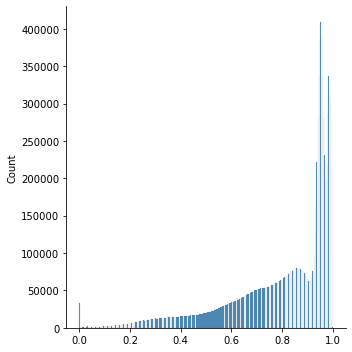

In [7]:
sns.displot(img.flatten())

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'orig.ident' as categorical
... storing 'cell_type_image' as categorical
... storing 'HandE_v3' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


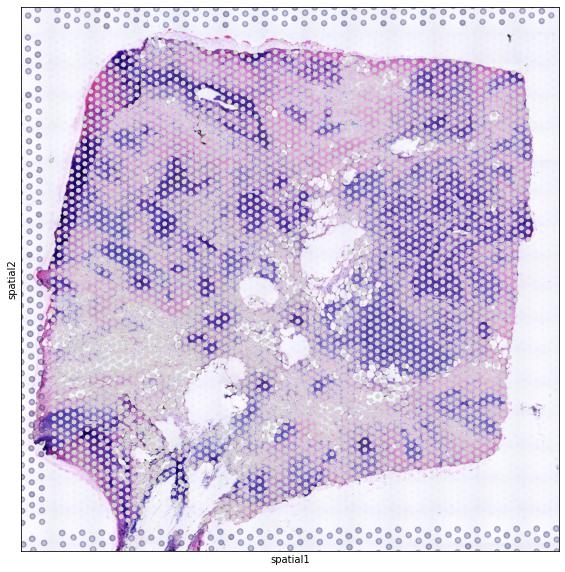

In [8]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
sc.pl.spatial(adata)

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


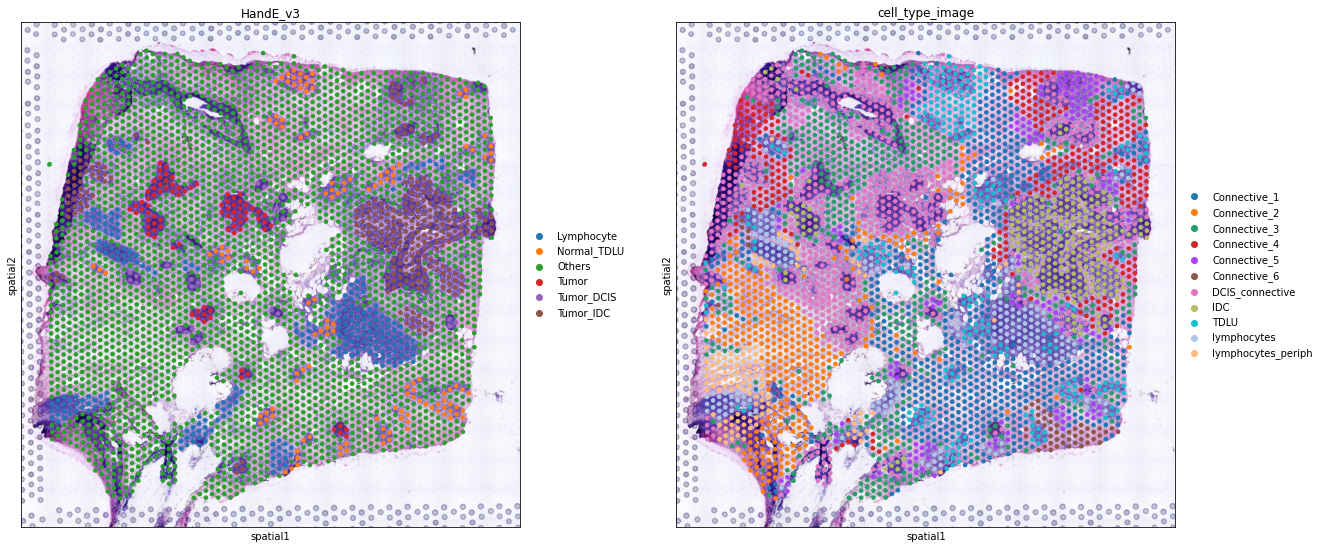

In [9]:
sc.pl.spatial(adata, color=['HandE_v3', 'cell_type_image'])

In [10]:
adata.obs

in_tissue  array_row  array_col     orig.ident  \
AAACAAGTATCTCCCA-1          1         50        102  SeuratProject   
AAACAATCTACTAGCA-1          1          3         43  SeuratProject   
AAACACCAATAACTGC-1          1         59         19  SeuratProject   
AAACAGAGCGACTCCT-1          1         14         94  SeuratProject   
AAACAGCTTTCAGAAG-1          1         43          9  SeuratProject   
...                       ...        ...        ...            ...   
TTGTTGTGTGTCAAGA-1          1         31         77  SeuratProject   
TTGTTTCACATCCAGG-1          1         58         42  SeuratProject   
TTGTTTCATTAGTCTA-1          1         60         30  SeuratProject   
TTGTTTCCATACAACT-1          1         45         27  SeuratProject   
TTGTTTGTGTAAATTC-1          1          7         51  SeuratProject   

                    nCount_Spatial  nFeature_Spatial  nCount_SCT  \
AAACAAGTATCTCCCA-1            1195               778        5615   
AAACAATCTACTAGCA-1           40160              7370        7616   
AAACACCAATAACTGC-1           24709              6244        7450   
AAACAGAGCGACTCCT-1            1842              1020        5852   
AAACAGCTTTCAGAAG-1           49222              9217        8601   
...                            ...               ...         ...   
TTGTTGTGTGTCAAGA-1            6233              2829        6598   
TTGTTTCACATCCAGG-1           44782              7502        7672   
TTGTTTCATTAGTCTA-1            4678              2127        6315   
TTGTTTCCATACAACT-1            1730               978        5789   
TTGTTTGTGTAAATTC-1           10153              3729        8023   

                    nFeature_SCT  SCT_snn_res.0.8  seurat_clusters  \
AAACAAGTATCTCCCA-1          1444                0                0   
AAACAATCTACTAGCA-1          3449                2                2   
AAACACCAATAACTGC-1          3396               10               10   
AAACAGAGCGACTCCT-1          1394                1                1   
AAACAGCTTTCAGAAG-1          4330                7                7   
...                          ...              ...              ...   
TTGTTGTGTGTCAAGA-1          2828                8                8   
TTGTTTCACATCCAGG-1          3442                6                6   
TTGTTTCATTAGTCTA-1          2127                4                4   
TTGTTTCCATACAACT-1          1387                0                0   
TTGTTTGTGTAAATTC-1          3709               12               12   

                    orig_cluster  cell_type_image     HandE_v3  
AAACAAGTATCTCCCA-1             0     Connective_1       Others  
AAACAATCTACTAGCA-1             2  DCIS_connective    Tumor_IDC  
AAACACCAATAACTGC-1            10     Connective_5       Others  
AAACAGAGCGACTCCT-1             1     Connective_2       Others  
AAACAGCTTTCAGAAG-1             7             TDLU  Normal_TDLU  
...                          ...              ...          ...  
TTGTTGTGTGTCAAGA-1             8     Connective_3       Others  
TTGTTTCACATCCAGG-1             6              IDC    Tumor_IDC  
TTGTTTCATTAGTCTA-1             4     Connective_4       Others  
TTGTTTCCATACAACT-1             0     Connective_1       Others  
TTGTTTGTGTAAATTC-1            12     Connective_6       Others  

[3651 rows x 13 columns]

In [11]:
key='BRCA_206B1'
coords = adata.obsm['spatial']
img = adata.uns['spatial'][key]['images']['hires']

scaler = adata.uns['spatial'][key]['scalefactors']['tissue_hires_scalef']
d = adata.uns['spatial'][key]['scalefactors']['spot_diameter_fullres']


In [12]:
coords, img.shape, np.max(coords, axis=0), he_img.shape, d

(array([[13936, 16758],
        [ 2447,  8630],
        [16013,  5155],
        ...,
        [16271,  6688],
        [12624,  6303],
        [ 3429,  9738]]),
 (2000, 1969, 3),
 array([19215, 20334]),
 (22449, 22103, 3),
 181.4184214279795)

In [28]:
boxes = []
for c, r in coords:
    r1, r2 = int(r - (d * .5)),  int(r + (d * .5))
    c1, c2 =  int(c - (d * .5)),  int(c + (d * .5))
    boxes.append([(r1, c1), (r2, c2)])

imgs = [he_img[r1:r2, c1:c2] for (r1, c1), (r2, c2) in boxes]
# imgs = [resize(img, (64, 64, 3)) for img in imgs]

In [42]:
test_id = adata.obs.index[5]
i = adata.obs.index.to_list().index(test_id)
i

5

In [43]:
adata.obs.iloc[i]

in_tissue                       1
array_row                      47
array_col                      13
orig.ident          SeuratProject
nCount_Spatial                566
nFeature_Spatial              393
nCount_SCT                   5405
nFeature_SCT                 1476
SCT_snn_res.0.8                 0
seurat_clusters                 0
orig_cluster                    0
cell_type_image      Connective_1
HandE_v3                   Others
highlight                   False
Name: AAACAGGGTCTATATT-1, dtype: object

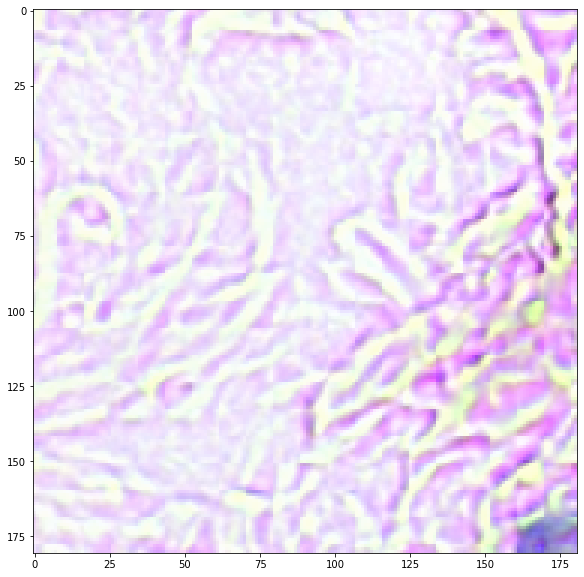

In [44]:
plt.imshow(imgs[i])

In [45]:
adata.obs['highlight'] = ['target' if c==test_id else False for c in adata.obs.index]

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


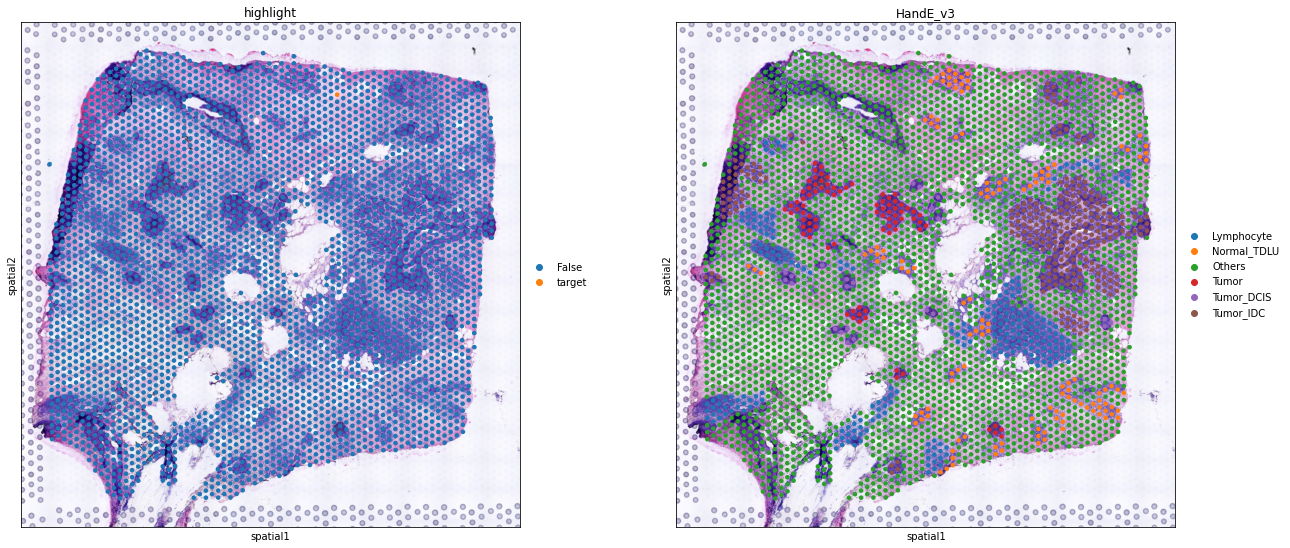

In [54]:
sc.pl.spatial(adata, color=['highlight', 'HandE_v3'])

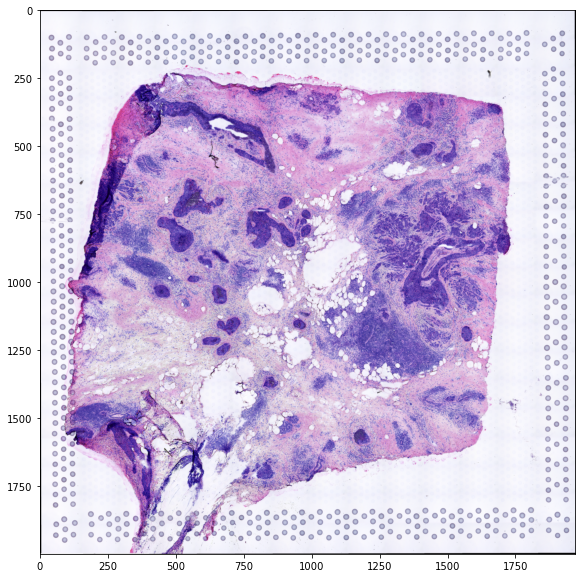

In [18]:
plt.imshow(img)

In [ ]:
plt.imshow(resized)

In [47]:
from skimage.transform import resize
def extract_spot_images(adata, full_res, key='BRCA_206B1'):
    coords = adata.obsm['spatial']    
    scaler = adata.uns['spatial'][key]['scalefactors']['tissue_hires_scalef']
    d = adata.uns['spatial'][key]['scalefactors']['spot_diameter_fullres']
    
    boxes = []
    for c, r in coords:
        r1, r2 = int(r - (d * .5)),  int(r + (d * .5))
        c1, c2 =  int(c - (d * .5)),  int(c + (d * .5))
        boxes.append([(r1, c1), (r2, c2)])

    imgs = [full_res[r1:r2, c1:c2] for (r1, c1), (r2, c2) in boxes]
    # imgs = [resize(img, (64, 64, 3)) for img in imgs]
    return imgs

In [48]:
imgs = extract_spot_images(adata, he_img)
len(imgs)

3651

In [49]:
# export data
adata.obs

in_tissue  array_row  array_col     orig.ident  \
AAACAAGTATCTCCCA-1          1         50        102  SeuratProject   
AAACAATCTACTAGCA-1          1          3         43  SeuratProject   
AAACACCAATAACTGC-1          1         59         19  SeuratProject   
AAACAGAGCGACTCCT-1          1         14         94  SeuratProject   
AAACAGCTTTCAGAAG-1          1         43          9  SeuratProject   
...                       ...        ...        ...            ...   
TTGTTGTGTGTCAAGA-1          1         31         77  SeuratProject   
TTGTTTCACATCCAGG-1          1         58         42  SeuratProject   
TTGTTTCATTAGTCTA-1          1         60         30  SeuratProject   
TTGTTTCCATACAACT-1          1         45         27  SeuratProject   
TTGTTTGTGTAAATTC-1          1          7         51  SeuratProject   

                    nCount_Spatial  nFeature_Spatial  nCount_SCT  \
AAACAAGTATCTCCCA-1            1195               778        5615   
AAACAATCTACTAGCA-1           40160              7370        7616   
AAACACCAATAACTGC-1           24709              6244        7450   
AAACAGAGCGACTCCT-1            1842              1020        5852   
AAACAGCTTTCAGAAG-1           49222              9217        8601   
...                            ...               ...         ...   
TTGTTGTGTGTCAAGA-1            6233              2829        6598   
TTGTTTCACATCCAGG-1           44782              7502        7672   
TTGTTTCATTAGTCTA-1            4678              2127        6315   
TTGTTTCCATACAACT-1            1730               978        5789   
TTGTTTGTGTAAATTC-1           10153              3729        8023   

                    nFeature_SCT  SCT_snn_res.0.8  seurat_clusters  \
AAACAAGTATCTCCCA-1          1444                0                0   
AAACAATCTACTAGCA-1          3449                2                2   
AAACACCAATAACTGC-1          3396               10               10   
AAACAGAGCGACTCCT-1          1394                1                1   
AAACAGCTTTCAGAAG-1          4330                7                7   
...                          ...              ...              ...   
TTGTTGTGTGTCAAGA-1          2828                8                8   
TTGTTTCACATCCAGG-1          3442                6                6   
TTGTTTCATTAGTCTA-1          2127                4                4   
TTGTTTCCATACAACT-1          1387                0                0   
TTGTTTGTGTAAATTC-1          3709               12               12   

                    orig_cluster  cell_type_image     HandE_v3 highlight  
AAACAAGTATCTCCCA-1             0     Connective_1       Others     False  
AAACAATCTACTAGCA-1             2  DCIS_connective    Tumor_IDC     False  
AAACACCAATAACTGC-1            10     Connective_5       Others     False  
AAACAGAGCGACTCCT-1             1     Connective_2       Others     False  
AAACAGCTTTCAGAAG-1             7             TDLU  Normal_TDLU     False  
...                          ...              ...          ...       ...  
TTGTTGTGTGTCAAGA-1             8     Connective_3       Others     False  
TTGTTTCACATCCAGG-1             6              IDC    Tumor_IDC     False  
TTGTTTCATTAGTCTA-1             4     Connective_4       Others     False  
TTGTTTCCATACAACT-1             0     Connective_1       Others     False  
TTGTTTGTGTAAATTC-1            12     Connective_6       Others     False  

[3651 rows x 14 columns]

In [55]:
from collections import Counter
Counter(adata.obs['HandE_v3'])

Counter({'Others': 2883,
         'Tumor_IDC': 277,
         'Normal_TDLU': 133,
         'Lymphocyte': 250,
         'Tumor': 85,
         'Tumor_DCIS': 23})

In [51]:
adata.uns['cell_to_HE'] = {c:img for c, img in zip(adata.obs.index, imgs)}


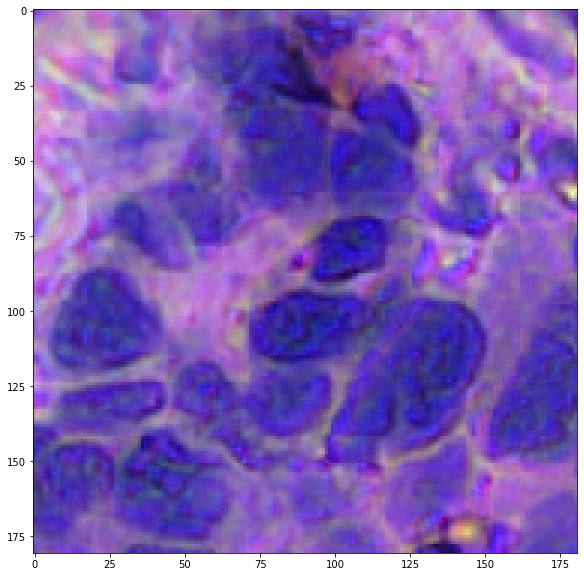

In [52]:
plt.imshow(adata.uns['cell_to_HE']['TTGTTTCACATCCAGG-1'])

In [104]:
!mkdir ../data/brca_HT206/model_training_v2/trans

In [102]:
# metadata = adata.obs[[True if x != 'Others' else False
#                      for x in adata.obs['HandE_v3']]]
metadata = adata.obs.copy()
metadata.to_csv('../data/brca_HT206/model_training_v2/metadata.txt', sep='\t')

In [108]:
pow(2, 8)

256

In [117]:
!ls ../data/brca_HT206/model_training_v2/

he           metadata.txt trans


In [141]:
from PIL import Image
imgs = [adata.uns['cell_to_HE'][i] for i in metadata.index]
from skimage.transform import resize
# X = None
for x, s_id in zip(imgs, metadata.index):
    reshaped = resize(x, (112, 112, 3))
    im = Image.fromarray((reshaped * 255).astype(np.uint8))
    im.save(f'../data/brca_HT206/model_training_v2/he/{s_id}.jpeg')
#     reshaped = np.expand_dims(reshaped, axis=0)
#     if X is None:
#         X = reshaped
#     else:
#         X = np.concatenate((X, reshaped), axis=0)
# X.shape

# np.save('../data/brca_HT206/model_training_v2/images.npy', X)

In [113]:
# now get the transcriptomics
df = pd.read_csv("../data/brca_HT206/sctransform_scaled.txt", sep='\t')
df

AAACAAGTATCTCCCA-1  AAACAATCTACTAGCA-1  AAACACCAATAACTGC-1  \
AL627309.1           -0.005607           -0.076938           -0.060601   
AL627309.5           -0.039133            3.953426           -0.163833   
LINC01409            -0.056014           -0.280952           -0.231278   
LINC01128            -0.091741            0.900069           -0.433672   
LINC00115            -0.022728           -0.206714           -0.165647   
...                        ...                 ...                 ...   
AL354822.1           -0.008172           -0.074900           -0.059517   
AL592183.1           -0.043663           -0.180027           -0.149508   
AC240274.1           -0.051380           -0.175946           -0.148038   
AC004556.3           -0.201425           -0.159326           -0.800795   
AC007325.4           -0.113255           -0.495367           -0.412514   

            AAACAGAGCGACTCCT-1  AAACAGCTTTCAGAAG-1  AAACAGGGTCTATATT-1  \
AL627309.1           -0.009919           -0.084571            0.000190   
AL627309.5           -0.049013           -0.216289           -0.025859   
LINC01409            -0.069952           -0.303586           -0.037313   
LINC01128            -0.118877           -0.571353           -0.055516   
LINC00115            -0.034038           -0.225555           -0.007554   
...                        ...                 ...                 ...   
AL354822.1           -0.012172           -0.082109           -0.002804   
AL592183.1           -0.052073           -0.194085           -0.032345   
AC240274.1           -0.059067           -0.188817           -0.041029   
AC004556.3           -0.247113           -0.327856           -0.141459   
AC007325.4           -0.137156            6.776871           -0.081266   

            AAACATTTCCCGGATT-1  AAACCCGAACGAAATC-1  AAACCGGGTAGGTACC-1  \
AL627309.1           -0.047216           -0.024661           -0.021013   
AL627309.5           -0.133905           -0.082742           -0.074408   
LINC01409            -0.189512           -0.117558           -0.105798   
LINC01128            -0.352727           -0.212011           -0.188969   
LINC00115            -0.131368           -0.072697           -0.063139   
...                        ...                 ...                 ...   
AL354822.1           -0.046959           -0.025884           -0.022486   
AL592183.1           -0.124122           -0.080729           -0.073654   
AC240274.1           -0.124849           -0.085236           -0.078777   
AC004556.3           -0.656139           -0.407467            2.290213   
AC007325.4           -0.341895           -0.218898           -0.198708   

            AAACCGTTCGTCCAGG-1  ...  TTGTGTATGCCACCAA-1  TTGTGTTTCCCGAAAG-1  \
AL627309.1           -0.055737  ...           -0.106688           -0.067405   
AL627309.5           -0.153003  ...           -0.263062           -0.178886   
LINC01409            -0.216201  ...           -0.366797           -0.252158   
LINC01128            -0.404546  ...            0.251348           -0.473798   
LINC00115            -0.153250  ...           -0.278686           -0.182866   
...                        ...  ...                 ...                 ...   
AL354822.1           -0.054949  ...           -0.103080           -0.065917   
AL592183.1           -0.140320  ...           -0.233992           -0.162287   
AC240274.1           -0.139642  ...           -0.225428           -0.159718   
AC004556.3           -0.748691  ...           -0.737825           -0.872581   
AC007325.4           -0.387108  ...           -0.634676           -0.447510   

            TTGTTAGCAAATTCGA-1  TTGTTCAGTGTGCTAC-1  TTGTTCTAGATACGCT-1  \
AL627309.1           -0.029016           -0.047997           -0.030557   
AL627309.5           -0.092674           -0.135661           -0.096184   
LINC01409            -0.131563           -0.191971           -0.136510   
LINC01128            -0.239456            1.950228           -0.249148   
LINC00115            -0.08

In [114]:
adata.obs

in_tissue  array_row  array_col     orig.ident  \
AAACAAGTATCTCCCA-1          1         50        102  SeuratProject   
AAACAATCTACTAGCA-1          1          3         43  SeuratProject   
AAACACCAATAACTGC-1          1         59         19  SeuratProject   
AAACAGAGCGACTCCT-1          1         14         94  SeuratProject   
AAACAGCTTTCAGAAG-1          1         43          9  SeuratProject   
...                       ...        ...        ...            ...   
TTGTTGTGTGTCAAGA-1          1         31         77  SeuratProject   
TTGTTTCACATCCAGG-1          1         58         42  SeuratProject   
TTGTTTCATTAGTCTA-1          1         60         30  SeuratProject   
TTGTTTCCATACAACT-1          1         45         27  SeuratProject   
TTGTTTGTGTAAATTC-1          1          7         51  SeuratProject   

                    nCount_Spatial  nFeature_Spatial  nCount_SCT  \
AAACAAGTATCTCCCA-1            1195               778        5615   
AAACAATCTACTAGCA-1           40160              7370        7616   
AAACACCAATAACTGC-1           24709              6244        7450   
AAACAGAGCGACTCCT-1            1842              1020        5852   
AAACAGCTTTCAGAAG-1           49222              9217        8601   
...                            ...               ...         ...   
TTGTTGTGTGTCAAGA-1            6233              2829        6598   
TTGTTTCACATCCAGG-1           44782              7502        7672   
TTGTTTCATTAGTCTA-1            4678              2127        6315   
TTGTTTCCATACAACT-1            1730               978        5789   
TTGTTTGTGTAAATTC-1           10153              3729        8023   

                    nFeature_SCT  SCT_snn_res.0.8  seurat_clusters  \
AAACAAGTATCTCCCA-1          1444                0                0   
AAACAATCTACTAGCA-1          3449                2                2   
AAACACCAATAACTGC-1          3396               10               10   
AAACAGAGCGACTCCT-1          1394                1                1   
AAACAGCTTTCAGAAG-1          4330                7                7   
...                          ...              ...              ...   
TTGTTGTGTGTCAAGA-1          2828                8                8   
TTGTTTCACATCCAGG-1          3442                6                6   
TTGTTTCATTAGTCTA-1          2127                4                4   
TTGTTTCCATACAACT-1          1387                0                0   
TTGTTTGTGTAAATTC-1          3709               12               12   

                    orig_cluster  cell_type_image     HandE_v3 highlight  
AAACAAGTATCTCCCA-1             0     Connective_1       Others     False  
AAACAATCTACTAGCA-1             2  DCIS_connective    Tumor_IDC     False  
AAACACCAATAACTGC-1            10     Connective_5       Others     False  
AAACAGAGCGACTCCT-1             1     Connective_2       Others     False  
AAACAGCTTTCAGAAG-1             7             TDLU  Normal_TDLU     False  
...                          ...              ...          ...       ...  
TTGTTGTGTGTCAAGA-1             8     Connective_3       Others     False  
TTGTTTCACATCCAGG-1             6              IDC    Tumor_IDC     False  
TTGTTTCATTAGTCTA-1             4     Connective_4       Others     False  
TTGTTTCCATACAACT-1             0     Connective_1       Others     False  
TTGTTTGTGTAAATTC-1            12     Connective_6       Others     False  

[3651 rows x 14 columns]

In [118]:
df.to_csv('../data/brca_HT206/model_training_v2/transcriptomics.tsv', sep='\t')

In [98]:
adata.obsm['spatial']

array([[13936, 16758],
       [ 2447,  8630],
       [16013,  5155],
       ...,
       [16271,  6688],
       [12624,  6303],
       [ 3429,  9738]])

In [97]:
len(set(adata.obsm['spatial'][:, 0].flatten()))

3651

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.values.transpose())

StandardScaler()

In [144]:
#transcription image
rc_to_id = {(r, c):i for i, r, c in zip(adata.obs.index, adata.obs['array_row'], adata.obs['array_col'])}
row_max = np.max(adata.obs['array_row'])
col_max = np.max(adata.obs['array_col'])
X = np.zeros((row_max, col_max, df.shape[0])).astype(np.float32)
for r in range(row_max):
    for c in range(col_max):
        spot_id = rc_to_id.get((r, c))
        if spot_id is not None:
            x = df[spot_id].to_numpy()
            X[r, c] = scaler.transform([x])[0]
        
        

# adata.X.shape

In [145]:
X.shape

(72, 127, 20444)

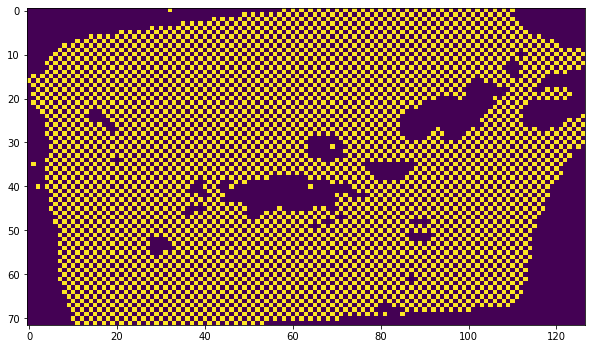

In [146]:
plt.imshow(np.count_nonzero(X, axis=2))

In [147]:
np.save('../data/brca_HT206/model_training_v2/trans_block.npy', X)

In [134]:
import json
json.dump({f'{r}_{c}':s for (r, c), s in rc_to_id.items()},
          open('../data/brca_HT206/model_training_v2/trans_rc_to_id.json', 'w'))

In [129]:
# pad = 4
# for (r, c), sid in rc_to_id.items():
#     if r - pad > 0 and r + pad < row_max and c - pad > 0 and c + pad < col_max:
#         x = X[r - pad:r + pad, c - pad:c + pad]
#         print(x.shape)
#         tifffile.imsave(f'../data/brca_HT206/model_training_v2/trans/{sid}.tiff', x)

In [81]:
df['AAACAAGTATCTCCCA-1'].to_numpy()

array([-0.00560666, -0.03913274, -0.05601397, ..., -0.05138023,
       -0.2014248 , -0.1132555 ])

In [75]:
adata.obs

in_tissue  array_row  array_col     orig.ident  \
AAACAAGTATCTCCCA-1          1         50        102  SeuratProject   
AAACAATCTACTAGCA-1          1          3         43  SeuratProject   
AAACACCAATAACTGC-1          1         59         19  SeuratProject   
AAACAGAGCGACTCCT-1          1         14         94  SeuratProject   
AAACAGCTTTCAGAAG-1          1         43          9  SeuratProject   
...                       ...        ...        ...            ...   
TTGTTGTGTGTCAAGA-1          1         31         77  SeuratProject   
TTGTTTCACATCCAGG-1          1         58         42  SeuratProject   
TTGTTTCATTAGTCTA-1          1         60         30  SeuratProject   
TTGTTTCCATACAACT-1          1         45         27  SeuratProject   
TTGTTTGTGTAAATTC-1          1          7         51  SeuratProject   

                    nCount_Spatial  nFeature_Spatial  nCount_SCT  \
AAACAAGTATCTCCCA-1            1195               778        5615   
AAACAATCTACTAGCA-1           40160              7370        7616   
AAACACCAATAACTGC-1           24709              6244        7450   
AAACAGAGCGACTCCT-1            1842              1020        5852   
AAACAGCTTTCAGAAG-1           49222              9217        8601   
...                            ...               ...         ...   
TTGTTGTGTGTCAAGA-1            6233              2829        6598   
TTGTTTCACATCCAGG-1           44782              7502        7672   
TTGTTTCATTAGTCTA-1            4678              2127        6315   
TTGTTTCCATACAACT-1            1730               978        5789   
TTGTTTGTGTAAATTC-1           10153              3729        8023   

                    nFeature_SCT  SCT_snn_res.0.8  seurat_clusters  \
AAACAAGTATCTCCCA-1          1444                0                0   
AAACAATCTACTAGCA-1          3449                2                2   
AAACACCAATAACTGC-1          3396               10               10   
AAACAGAGCGACTCCT-1          1394                1                1   
AAACAGCTTTCAGAAG-1          4330                7                7   
...                          ...              ...              ...   
TTGTTGTGTGTCAAGA-1          2828                8                8   
TTGTTTCACATCCAGG-1          3442                6                6   
TTGTTTCATTAGTCTA-1          2127                4                4   
TTGTTTCCATACAACT-1          1387                0                0   
TTGTTTGTGTAAATTC-1          3709               12               12   

                    orig_cluster  cell_type_image     HandE_v3 highlight  
AAACAAGTATCTCCCA-1             0     Connective_1       Others     False  
AAACAATCTACTAGCA-1             2  DCIS_connective    Tumor_IDC     False  
AAACACCAATAACTGC-1            10     Connective_5       Others     False  
AAACAGAGCGACTCCT-1             1     Connective_2       Others     False  
AAACAGCTTTCAGAAG-1             7             TDLU  Normal_TDLU     False  
...                          ...              ...          ...       ...  
TTGTTGTGTGTCAAGA-1             8     Connective_3       Others     False  
TTGTTTCACATCCAGG-1             6              IDC    Tumor_IDC     False  
TTGTTTCATTAGTCTA-1             4     Connective_4       Others     False  
TTGTTTCCATACAACT-1             0     Connective_1       Others     False  
TTGTTTGTGTAAATTC-1            12     Connective_6       Others     False  

[3651 rows x 14 columns]

In [77]:
adata.obsm['spatial']

array([[13936, 16758],
       [ 2447,  8630],
       [16013,  5155],
       ...,
       [16271,  6688],
       [12624,  6303],
       [ 3429,  9738]])

In [76]:
set(adata.obs['array_row'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72}

In [120]:
## evaluate
df = pd.read_csv('/Users/erikstorrs/Downloads/metadata_with_predictions (2).txt', sep='\t')
df

Unnamed: 0        Unnamed: 0.1  in_tissue  array_row  array_col  \
0             1  AAACAATCTACTAGCA-1          1          3         43   
1             4  AAACAGCTTTCAGAAG-1          1         43          9   
2            11  AAACCTCATGAAGTTG-1          1         37         19   
3            18  AAACTCGGTTCGCAAT-1          1         66         70   
4            23  AAAGACCCAAGTCGCG-1          1         10         48   
..          ...                 ...        ...        ...        ...   
763        3598  TTGCGGCATCAGAAAG-1          1         53         45   
764        3612  TTGGACCTATAACAGT-1          1         56         86   
765        3634  TTGTGAACCTAATCCG-1          1         56         90   
766        3641  TTGTGTATGCCACCAA-1          1         56         60   
767        3647  TTGTTTCACATCCAGG-1          1         58         42   

        orig.ident  nCount_Spatial  nFeature_Spatial  nCount_SCT  \
0    SeuratProject           40160              7370        7616   
1    SeuratProject           49222              9217        8601   
2    SeuratProject            8756              3721        7892   
3    SeuratProject           99615              9056        6970   
4    SeuratProject           22433              5977        7946   
..             ...             ...               ...         ...   
763  SeuratProject          109927             10103        7367   
764  SeuratProject           67988              9555        7727   
765  SeuratProject            6552              2617        6797   
766  SeuratProject           83815              8987        7376   
767  SeuratProject           44782              7502        7672   

     nFeature_SCT  SCT_snn_res.0.8  seurat_clusters  orig_cluster  \
0            3449                2                2             2   
1            4330                7                7             7   
2            3718                7                7             7   
3            2486                6                6             6   
4            3639                9                9             9   
..            ...              ...              ...           ...   
763          3269                6                6             6   
764          3383                7                7             7   
765          2616                0                0             0   
766          3020                6                6             6   
767          3442                6                6             6   

     cell_type_image     HandE_v3   predicted        label  prediction  
0    DCIS_connective    Tumor_IDC  Lymphocyte    Tumor_IDC  Lymphocyte  
1               TDLU  Normal_TDLU   Tumor_IDC  Normal_TDLU   Tumor_IDC  
2               TDLU  Normal_TDLU  Lymphocyte  Normal_TDLU  Lymphocyte  
3                IDC    Tumor_IDC   Tumor_IDC    Tumor_IDC   Tumor_IDC  
4        lymphocytes   Lymphocyte  Lymphocyte   Lymphocyte       Tumor  
..               ...          ...         ...          ...         ...  
763              IDC    Tumor_IDC   Tumor_IDC    Tumor_IDC   Tumor_IDC  
764             TDLU   Lymphocyte  Lymphocyte   Lymphocyte  Lymphocyte  
765     Connective_1   Lymphocyte  Lymphocyte   Lymphocyte   Tumor_IDC  
766              IDC    Tumor_IDC   Tumor_IDC    Tumor_IDC   Tumor_IDC  
767              IDC    Tumor_IDC  Lymphocyte    Tumor_IDC   Tumor_IDC  

[768 rows x 18 columns]

In [123]:
to_prediction = {c:d for c, d in zip(df['Unnamed: 0.1'], df['prediction'])}
adata.obs['predicted'] = [to_prediction.get(x, 'Others') for x in adata.obs.index]
adata.obs

in_tissue  array_row  array_col     orig.ident  \
AAACAAGTATCTCCCA-1          1         50        102  SeuratProject   
AAACAATCTACTAGCA-1          1          3         43  SeuratProject   
AAACACCAATAACTGC-1          1         59         19  SeuratProject   
AAACAGAGCGACTCCT-1          1         14         94  SeuratProject   
AAACAGCTTTCAGAAG-1          1         43          9  SeuratProject   
...                       ...        ...        ...            ...   
TTGTTGTGTGTCAAGA-1          1         31         77  SeuratProject   
TTGTTTCACATCCAGG-1          1         58         42  SeuratProject   
TTGTTTCATTAGTCTA-1          1         60         30  SeuratProject   
TTGTTTCCATACAACT-1          1         45         27  SeuratProject   
TTGTTTGTGTAAATTC-1          1          7         51  SeuratProject   

                    nCount_Spatial  nFeature_Spatial  nCount_SCT  \
AAACAAGTATCTCCCA-1            1195               778        5615   
AAACAATCTACTAGCA-1           40160              7370        7616   
AAACACCAATAACTGC-1           24709              6244        7450   
AAACAGAGCGACTCCT-1            1842              1020        5852   
AAACAGCTTTCAGAAG-1           49222              9217        8601   
...                            ...               ...         ...   
TTGTTGTGTGTCAAGA-1            6233              2829        6598   
TTGTTTCACATCCAGG-1           44782              7502        7672   
TTGTTTCATTAGTCTA-1            4678              2127        6315   
TTGTTTCCATACAACT-1            1730               978        5789   
TTGTTTGTGTAAATTC-1           10153              3729        8023   

                    nFeature_SCT  SCT_snn_res.0.8  seurat_clusters  \
AAACAAGTATCTCCCA-1          1444                0                0   
AAACAATCTACTAGCA-1          3449                2                2   
AAACACCAATAACTGC-1          3396               10               10   
AAACAGAGCGACTCCT-1          1394                1                1   
AAACAGCTTTCAGAAG-1          4330                7                7   
...                          ...              ...              ...   
TTGTTGTGTGTCAAGA-1          2828                8                8   
TTGTTTCACATCCAGG-1          3442                6                6   
TTGTTTCATTAGTCTA-1          2127                4                4   
TTGTTTCCATACAACT-1          1387                0                0   
TTGTTTGTGTAAATTC-1          3709               12               12   

                    orig_cluster  cell_type_image     HandE_v3   predicted  
AAACAAGTATCTCCCA-1             0     Connective_1       Others      Others  
AAACAATCTACTAGCA-1             2  DCIS_connective    Tumor_IDC  Lymphocyte  
AAACACCAATAACTGC-1            10     Connective_5       Others      Others  
AAACAGAGCGACTCCT-1             1     Connective_2       Others      Others  
AAACAGCTTTCAGAAG-1             7             TDLU  Normal_TDLU   Tumor_IDC  
...                          ...              ...          ...         ...  
TTGTTGTGTGTCAAGA-1             8     Connective_3       Others      Others  
TTGTTTCACATCCAGG-1             6              IDC    Tumor_IDC   Tumor_IDC  
TTGTTTCATTAGTCTA-1             4     Connective_4       Others      Others  
TTGTTTCCATACAACT-1             0     Connective_1       Others      Others  
TTGTTTGTGTAAATTC-1            12     Connective_6       Others      Others  

[3651 rows x 14 columns]

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'predicted' as categorical


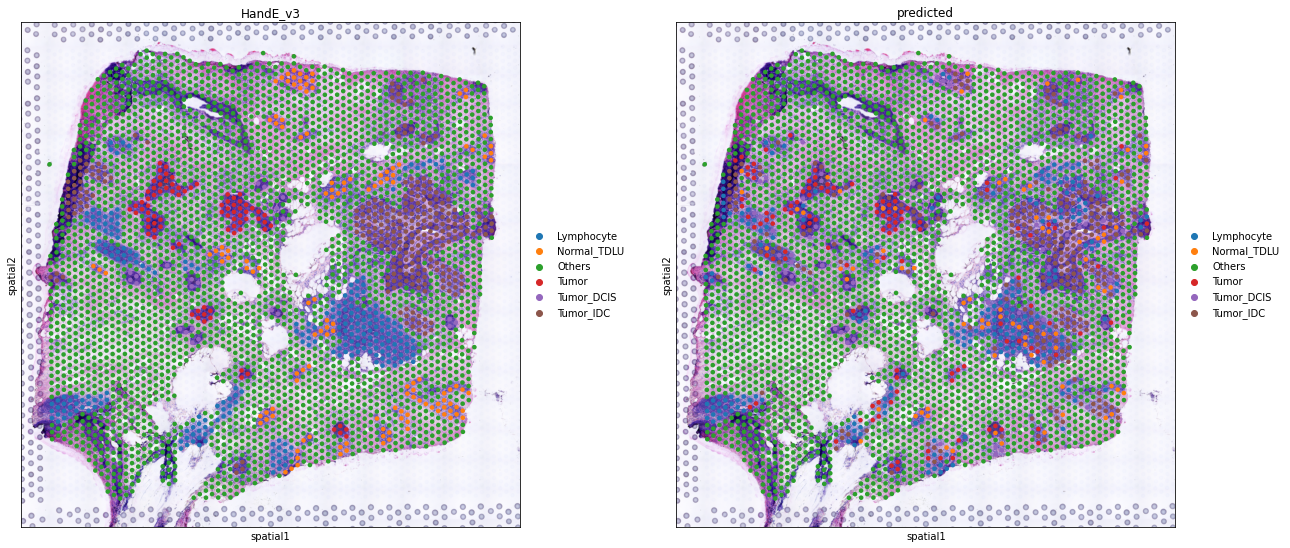

In [124]:
sc.pl.spatial(adata, color=['HandE_v3', 'predicted'])

In [125]:
emb = np.load('/Users/erikstorrs/Downloads/embeddings.npy')
emb.shape

(768, 1280)

In [126]:
filtered = adata[adata.obs['HandE_v3']!='Others']
filtered

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


View of AnnData object with n_obs × n_vars = 768 × 36601
    obs: 'in_tissue', 'array_row', 'array_col', 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'orig_cluster', 'cell_type_image', 'HandE_v3', 'predicted'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'cell_to_HE', 'HandE_v3_colors', 'predicted_colors', 'cell_type_image_colors'
    obsm: 'spatial'

In [127]:
filtered.obsm['classifier_embeddings'] = emb

In [129]:
from sklearn.preprocessing import StandardScaler
import umap
filtered.obsm['X_umap_embedding'] = umap.UMAP().fit_transform(StandardScaler().fit_transform(emb))

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


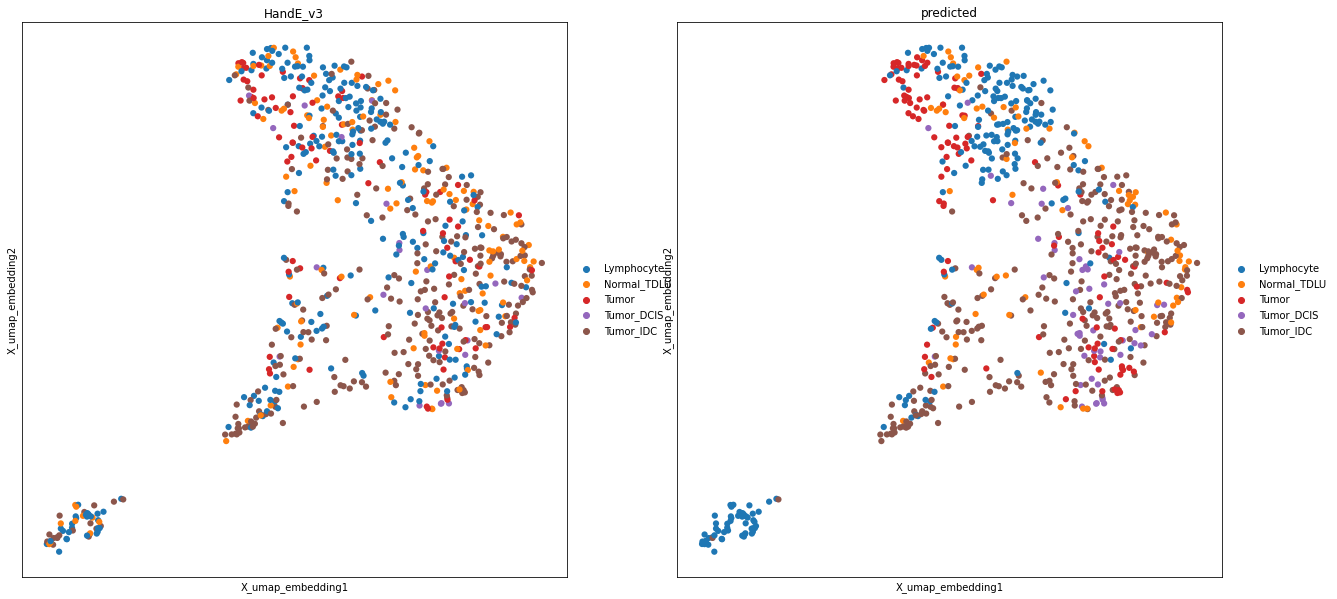

In [130]:
sc.pl.embedding(filtered, basis='X_umap_embedding', color=['HandE_v3', 'predicted'])

In [136]:
import anndata
emb_adata = anndata.AnnData(X=emb, obs=filtered.obs)
sc.pp.scale(emb_adata)
sc.pp.neighbors(emb_adata, use_rep='X', n_neighbors=5)
# sc.pp.pca(emb_adata)

sc.tl.umap(emb_adata)
sc.tl.leiden(emb_adata, resolution=1.)
emb_adata

AnnData object with n_obs × n_vars = 768 × 1280
    obs: 'in_tissue', 'array_row', 'array_col', 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters', 'orig_cluster', 'cell_type_image', 'HandE_v3', 'predicted', 'leiden'
    var: 'mean', 'std'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

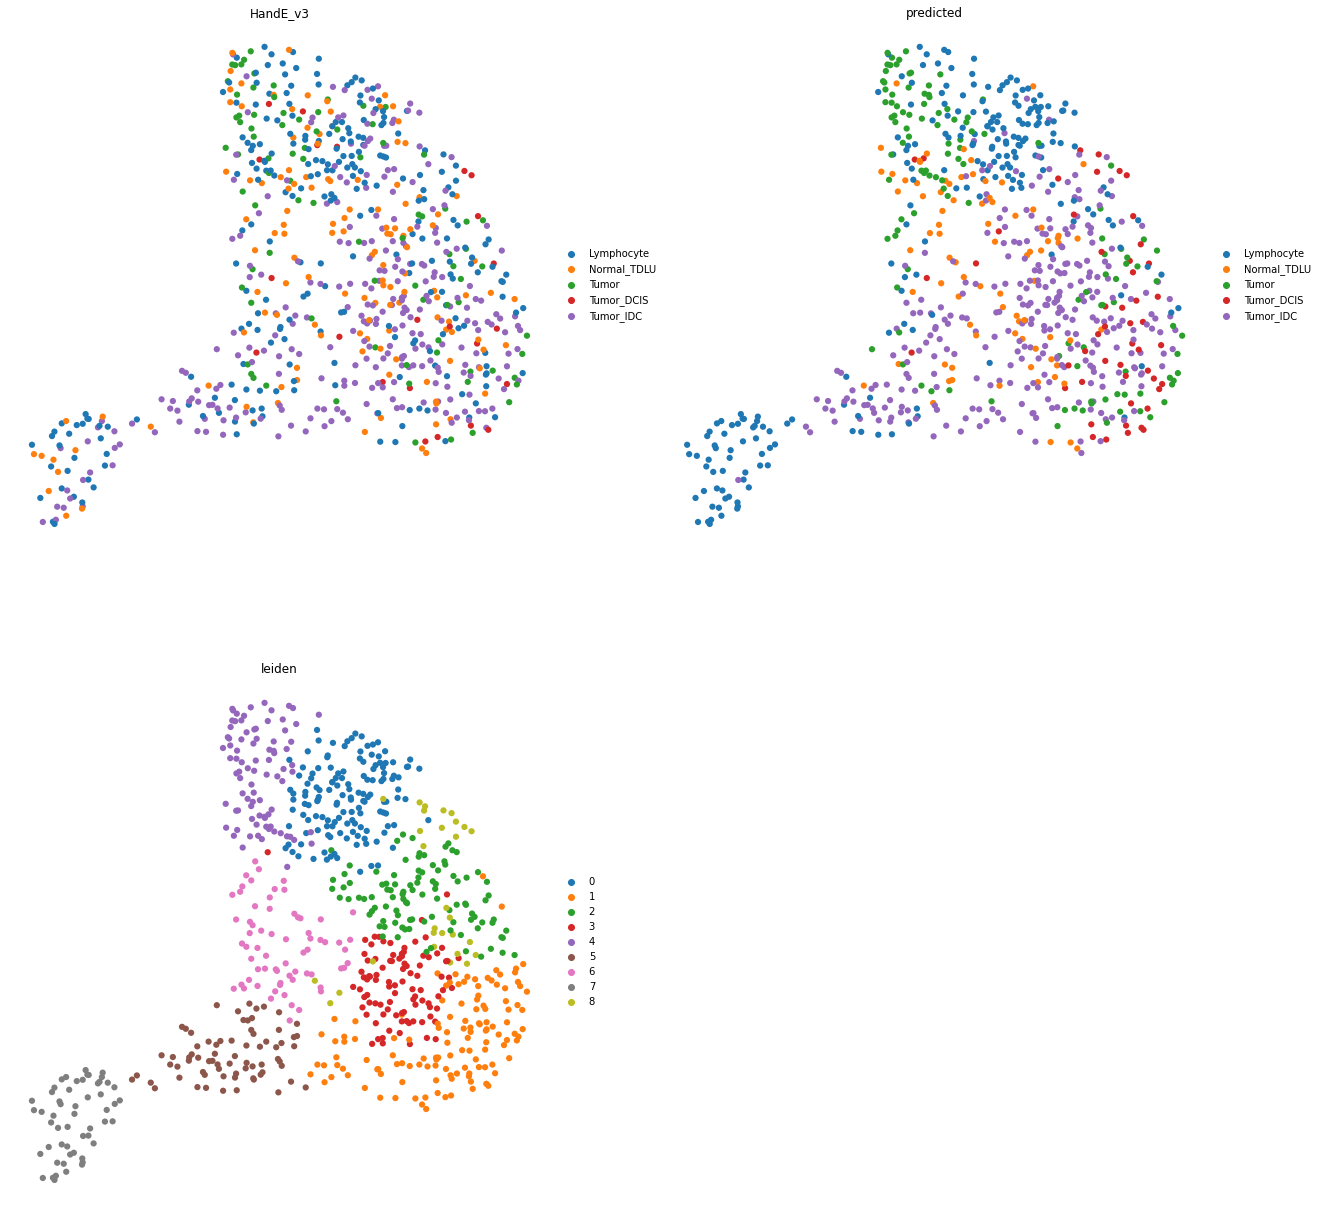

In [167]:
plt.rcParams["figure.figsize"] = (10, 10)
sc.pl.umap(emb_adata, color=['HandE_v3', 'predicted', 'leiden'], frameon=False,
          ncols=2)

In [143]:
emb_adata[emb_adata.obs['leiden']=='7'].obs.index[:5]

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Index(['AAACAATCTACTAGCA-1', 'AACAATACATTGTCGA-1', 'AACCTGTCACGGAATT-1',
       'ACCGGTCTGAGTACGG-1', 'ACTATTTCCGGGCCCA-1'],
      dtype='object')

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


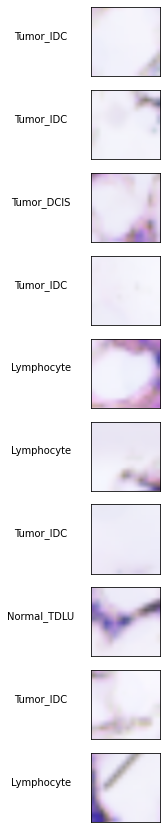

In [168]:
plt.rcParams["figure.figsize"] = (5, 15)
ids = emb_adata[emb_adata.obs['leiden']=='5'].obs.index[:10]
mask = [True if x in ids else False
       for x in adata.obs.index]
fig, axs = plt.subplots(nrows=len(ids), ncols=1)
for i, (cell_id, img) in enumerate(zip(ids, X[mask])):
    ax = axs[i]
#     print(emb_adata.obs.loc[i, 'HandE_v3'])
    ax.imshow(img)
    ax.set_ylabel(emb_adata.obs.loc[cell_id, 'HandE_v3'], rotation=0, labelpad=50)
    ax.set_xticks([])
    ax.set_yticks([])
#     plt.show()

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


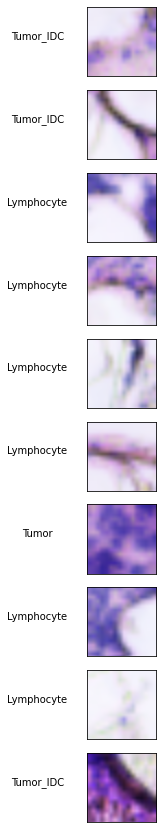

In [161]:
plt.rcParams["figure.figsize"] = (5, 15)
ids = emb_adata[emb_adata.obs['leiden']=='6'].obs.index[:10]
mask = [True if x in ids else False
       for x in adata.obs.index]
fig, axs = plt.subplots(nrows=len(ids), ncols=1)
for i, (cell_id, img) in enumerate(zip(ids, X[mask])):
    ax = axs[i]
#     print(emb_adata.obs.loc[i, 'HandE_v3'])
    ax.imshow(img)
    ax.set_ylabel(emb_adata.obs.loc[cell_id, 'HandE_v3'], rotation=0, labelpad=50)
    ax.set_xticks([])
    ax.set_yticks([])
#     plt.show()

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


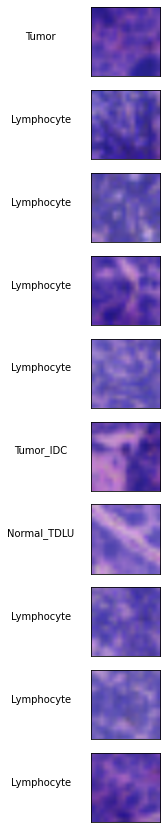

In [159]:
plt.rcParams["figure.figsize"] = (5, 15)
ids = emb_adata[emb_adata.obs['leiden']=='4'].obs.index[:10]
mask = [True if x in ids else False
       for x in adata.obs.index]
fig, axs = plt.subplots(nrows=len(ids), ncols=1)
for i, (cell_id, img) in enumerate(zip(ids, X[mask])):
    ax = axs[i]
#     print(emb_adata.obs.loc[i, 'HandE_v3'])
    ax.imshow(img)
    ax.set_ylabel(emb_adata.obs.loc[cell_id, 'HandE_v3'], rotation=0, labelpad=50)
    ax.set_xticks([])
    ax.set_yticks([])
#     plt.show()

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


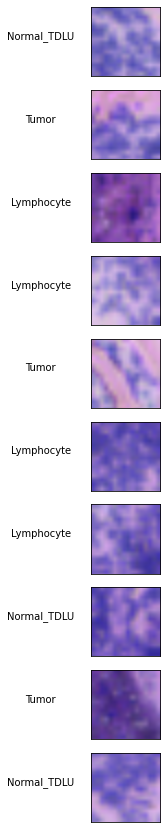

In [158]:
plt.rcParams["figure.figsize"] = (5, 15)
ids = emb_adata[emb_adata.obs['leiden']=='0'].obs.index[:10]
mask = [True if x in ids else False
       for x in adata.obs.index]
fig, axs = plt.subplots(nrows=len(ids), ncols=1)
for i, (cell_id, img) in enumerate(zip(ids, X[mask])):
    ax = axs[i]
#     print(emb_adata.obs.loc[i, 'HandE_v3'])
    ax.imshow(img)
    ax.set_ylabel(emb_adata.obs.loc[cell_id, 'HandE_v3'], rotation=0, labelpad=50)
    ax.set_xticks([])
    ax.set_yticks([])
#     plt.show()

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


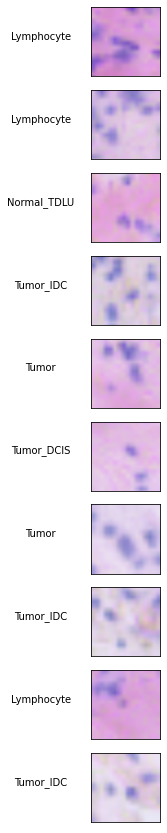

In [162]:
plt.rcParams["figure.figsize"] = (5, 15)
ids = emb_adata[emb_adata.obs['leiden']=='1'].obs.index[:10]
mask = [True if x in ids else False
       for x in adata.obs.index]
fig, axs = plt.subplots(nrows=len(ids), ncols=1)
for i, (cell_id, img) in enumerate(zip(ids, X[mask])):
    ax = axs[i]
#     print(emb_adata.obs.loc[i, 'HandE_v3'])
    ax.imshow(img)
    ax.set_ylabel(emb_adata.obs.loc[cell_id, 'HandE_v3'], rotation=0, labelpad=50)
    ax.set_xticks([])
    ax.set_yticks([])
#     plt.show()

/Users/erikstorrs/miniconda3/envs/spatial/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


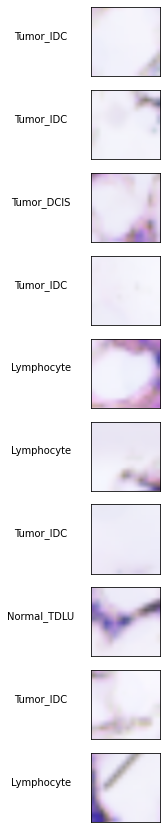

In [163]:
plt.rcParams["figure.figsize"] = (5, 15)
ids = emb_adata[emb_adata.obs['leiden']=='5'].obs.index[:10]
mask = [True if x in ids else False
       for x in adata.obs.index]
fig, axs = plt.subplots(nrows=len(ids), ncols=1)
for i, (cell_id, img) in enumerate(zip(ids, X[mask])):
    ax = axs[i]
#     print(emb_adata.obs.loc[i, 'HandE_v3'])
    ax.imshow(img)
    ax.set_ylabel(emb_adata.obs.loc[cell_id, 'HandE_v3'], rotation=0, labelpad=50)
    ax.set_xticks([])
    ax.set_yticks([])
#     plt.show()

In [145]:
X.shape

(3651, 64, 64, 3)

In [70]:
# !pip install synapseclient

In [71]:
import synapseclient 
import synapseutils 

In [72]:
syn = synapseclient.Synapse() 
syn.login('estorrs','bZPN7&21RndW') 
# files = synapseutils.syncFromSynapse(syn, ' syn21788217 ') 

Welcome, Erik Storrs!



In [73]:
files = synapseutils.syncFromSynapse(syn, ' syn22222600') 

ValueError: Cannot initiate a sync from an entity that is not a File or Folder